# Analysing sound wave using fast Fourier transform

## Sound wave

A sound wave consists of compression and rarefaction of air molecules, which travels through space with sound speed $c_s$.
The figure below depicts the propagation of a _sinusoidal_ sound wave inside an infinitely long rectangular channel.
The figure shows the snapshots of the air molecules (represented by blue dots in the figure) at four different instantaneous time $t=0\,\text{s}$, $0.001\,\text{s}$, $0.002\,\text{s}$, and $0.003\,\text{s}$.
The regions of high density are called the compression regions (these look like fuzzy vertical blue bands in the figure) and the regions of low density are called the rarefaction regions.
In the figure, these bands of compression and rarefaction regions travel along the positive $x$-direction with speed equals to the sound speed $c_s$.
Note that the air particles themselves do not drift in any direction.
If you track the individual particles, _e.g._ the red particle in the figure below, the particles oscillate back and forth around the same positions.
In other words, a sound wave is a propagation of energy but not mass.
The wavelength of this sinusoidal sound wave is defined by the distance between two nearest compression bands, which is equal to $\lambda=2\,\text{m}$.
As we can see from the figure, after time $t=0.003\,\text{s}$, the bands will have travelled a distance of $1\,\text{m}$.
Therefore the speed of sound in this example is equal to:
\begin{equation}
c_s = \frac{1\,\text{m}}{0.003\,\text{s}} \simeq 333\,\text{ms}^{-1}.
\end{equation}
In general, the speed of sound depends on various factors such as ambient pressure and temperature.

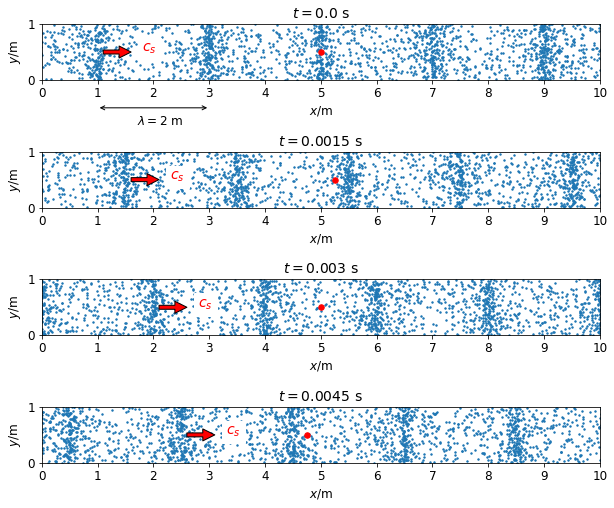

In [90]:
import matplotlib.pyplot as plt
import numpy as np

Np = 6000 # number of particles
Lx, Ly = 10, 1
Dx = 0.25 # maximum displacement
lamb = 1.0 # wavelength
phi = 0.0 # phase difference

t = np.arange(0, 0.0046, 0.0015)
t[0], t[1], t[2], t[3] = 0.0, 0.0015, 0.003, 0.0045

fig, ax = plt.subplots(4, figsize=(10,9))

for n in range(0, 4, 1):
    x = np.random.uniform(-Lx, 2*Lx, Np)
    y = np.random.uniform(0, Ly, Np)
    phi = np.pi/2*n
    x = x + Dx*np.sin(np.pi*x/lamb - phi)
    xtag = 5 + Dx*np.sin(np.pi*5/lamb - phi)
    ytag = 0.5

    ax[n].set_title(f'$t = ${t[n]} s', fontsize=14)
    ax[n].set_xlabel('$x/$m', fontsize=12)
    ax[n].set_ylabel('$y/$m', fontsize=12)
    ax[n].set_xlim(0, Lx)
    ax[n].set_ylim(0, Ly)
    ax[n].set_aspect(1)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].set_yticks(np.arange(0, 2, 1))
    ax[n].set_xticks(np.arange(0, 11, 1))
    ax[n].scatter(x, y, s=2)
    ax[n].scatter(xtag, ytag, s=30, c='red')
    ax[n].annotate('', xy=(1.6+n/2,0.5), xytext=(1.1+n/2,0.5), arrowprops=dict(facecolor='red'))  
    ax[n].annotate('$c_s$', fontsize=14, backgroundcolor='white', c='red', xy=(1.8+n/2,0.5))  

ax[0].annotate('', c='black',
            xy=(1.0,-0.5),  # location of the arrow tip
            xytext=(3.0,-0.5),  # location of arrow base (and text)
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'),
            annotation_clip=False)

ax[0].annotate('$\lambda=2$ m', c='black', fontsize=12, xy=(1.7,-0.8), annotation_clip=False)

plt.show()

Now suppose that that we place a microphone at the end of the channel.
The compression and rarefaction of air will cause the diaphragm inside the microphone to vibrate.
This vibration is then converted into an electrical signal, which is shown in the figure below.
The horizontal axis in the figure represents the time $t$ (in units of seconds).
The vertical axis represents the voltage of the electrical signal produced by the microphone $V(t)$ (in some rescaled units, which we do not need to worry about).
As we can see in this example, the audio signal in the figure below has a sinusoidal form, which can be descibed by a trigonometric function:
\begin{equation}
V(t) = A\cos(\omega t + \phi),
\end{equation}
where $V(t)$ is the audio signal (in some rescaled units), $t$ is time (in seconds), $A$ is the amplitude, $\omega$ is the angular frequency, and $\phi$ is the phase difference.
The angular frequency $\omega$ is related to the frequency $f$ and period $T$ of the sound wave through this relation:
\begin{equation}
\omega = 2\pi f = \frac{2\pi}{T}. 
\end{equation}
From the plot below, we can measure the period to be $T=0.006\,\text{s}$, which translates to audio frequency of $f=\frac{1}{T}\simeq167\,\text{Hz}$.
Hz (prounounced as Hertz) is the SI unit of frequency, defined to be $1\,\text{Hz}=1\,\text{s}^{-1}$.

In the equation above, $V$, $A$, $\omega$, $\phi$, and $t$ are all real. 
However, sometimes it might be useful to write the audio signal in a complex form (as we shall see later in Fourier series) as follows:
\begin{equation}
V(t) = C e^{i\omega t} + C^{*} e^{-i\omega t} \text{, where $C=\frac{A}{2}e^{i\phi}$ is the complex amplitude (the rest of the variables are real).}
\end{equation}
The star $*$ above $C$ indicates complex conjugate operation.

__Exercise 1.__
Show that the complex form of $V(t)$ in the equation above is equivalent to the trigonometric form of $V(t)$ in the first equation above.

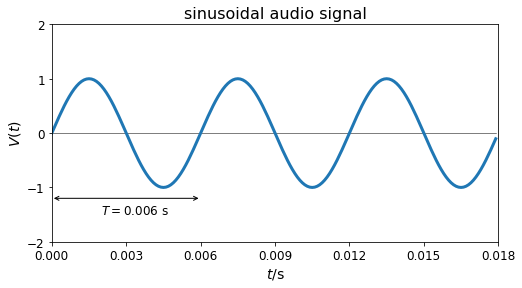

In [91]:
T = 0.006 # period
dt = 0.0001 # timestep
t = np.arange(0, 0.018, dt)
omega = np.pi*2/T
V = np.sin(omega*t)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('sinusoidal audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.018)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.019, 0.003))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black', xy=(0.0,-1.2), xytext=(0.006,-1.2),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$T = 0.006$ s', c='black', fontsize=12, xy=(0.002,-1.5), annotation_clip=False)

plt.show()

## Fourier series

In the plot above, the audio signal can be described by a single trigonometric function.
This is because we have assumed the sound wave to be sinusoidal.
However this is not true in general.
For example, the sound wave coming from a tuning fork is very close to a sinusoidal wave,
on the other hand, the sound wave coming from a saxophone is far from being sinusoidal.

Let us consider another audio signal from an unknown musical instrument, which is depicted in the figure below.
We can immediately tell that the signal is periodic with the same period $T=0.006\,\text{s}$ (or fundamental frequency $f\simeq167\,\text{Hz}$) as the one above.
However, the shape of the audio signal is much more complicated than a sinusoidal wave and cannot be simply described by a single trigonometric function.
Luckily, Fourier series allows us to decompose this periodic signal into a sum of trigonometric functions as follows:
\begin{equation}
V(t) = \sum_{p=-\infty}^{\infty} C_p e^{i\omega_p t} \text{, where }\omega_p=\frac{2\pi p}{T} \text{ and } p\in\mathbb{Z}.
\end{equation}
Each term in the Fourier series is a simple sinusoidal wave with angular frequency $\omega_p$ and
complex amplitude $C_p$'s.
The first non-constant term in the Fourier series corresponds to the _fundamental frequency_
$\omega_1 = \frac{2\pi}{T}$ shown by the first figure in the second row below.
The next term in the Fourier series has double the fundamental frequency $\omega_2=\frac{4\pi}{T}$ 
and is sometimes called the second harmonic (see the second figure in the second row below). 
The next next term has triple the fundamental frequency $\omega_3=\frac{6\pi}{T}$ and is sometimes called the third harmonic (see the third figure in the second row below).

To find the complex amplitudes $C_p$'s (or Fourier coefficients) we multiply the above equation by $e^{-i\omega_q t}$ and then integrate with respect to $t$ over one period from $t=-\frac{T}{2}$ to $t=\frac{T}{2}$.
\begin{equation}
\int_{-T/2}^{T/2} V(t) e^{-i\omega_q t}\,dt = \sum_{p=-\infty}^{\infty} C_p \int_{-T/2}^{T/2} e^{i(\omega_p - \omega_q) t}\,dt,
\end{equation}
where $p$ and $q$ are integers.
We note that the integral:
\begin{equation}
\int_{-T/2}^{T/2} e^{i(\omega_p - \omega_q) t}\,dt = \int_{-T/2}^{T/2} e^{i\frac{2\pi}{T}(p-q) t}\,dt =
\begin{cases}
T & \text{if } p = q \\
0 & \text{if } p \neq q
\end{cases}.
\end{equation}
More succintly, we can write,
\begin{equation}
\int_{-T/2}^{T/2} e^{i(\omega_p - \omega_q) t}\,dt = T \delta_{pq},
\end{equation}
where the Kronecker delta $\delta_{pq}$ is defined to be equal to $1$ if $p=q$ and $0$ if $p\neq q$.
Therefore,
\begin{align}
\int_{-T/2}^{T/2} V(t) e^{-i\omega_q t}\,dt &= \sum_{p=-\infty}^{\infty} C_p T \delta_{pq} = T C_q \\
\Rightarrow C_p &= \frac{1}{T} \int_{-T/2}^{T/2} V(t) e^{-i\omega_p t}\,dt.
\end{align}

__Exercise 2.__
(a) Show that if $C_{-p}=C_p^*$ for all $p\in\mathbb{Z}$, then $V(t)$ is real.
(b) Show that if $V(t)$ is real, then $C_{-p}=C_p^*$ for all $p\in\mathbb{Z}$.

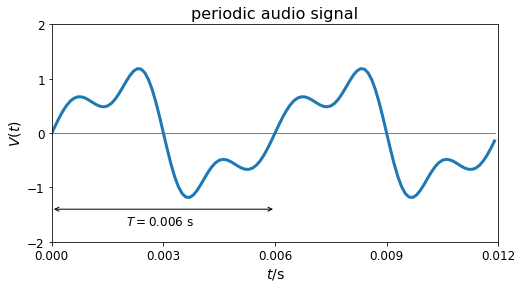

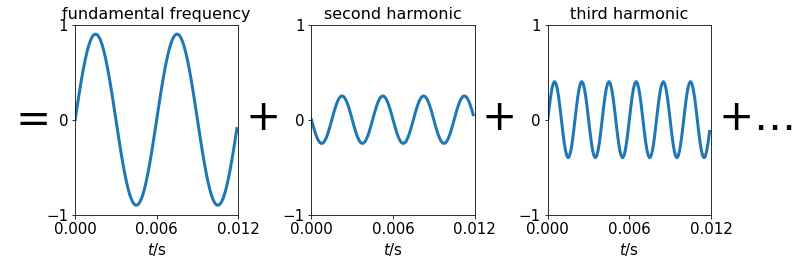

In [92]:
dt = 0.0001
T = 0.006
omega = np.pi*2/T
t = np.arange(0, 0.012, dt)
V = 0.9*np.sin(omega*t) - 0.25*np.sin(2*omega*t) + 0.4*np.sin(3*omega*t) - 0.05*np.sin(4*omega*t)
sin1 = 0.9*np.sin(omega*t)
sin2 = - 0.25*np.sin(2*omega*t)
sin3 = 0.4*np.sin(3*omega*t)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('periodic audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.012)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.013, 0.003))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black', xy=(0.0,-1.4), xytext=(0.006,-1.4),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$T = 0.006$ s', c='black', fontsize=12, xy=(0.002,-1.7))

plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))

for n in range(0, 3, 1):
    ax[n].set_xlabel('$t/$s', fontsize=15)
    ax[n].set_xlim(0, 0.012)
    ax[n].set_ylim(-1, 1)
    ax[n].set_aspect(0.007)
    ax[n].tick_params(axis='both', which='major', labelsize=15)
    ax[n].set_yticks(np.arange(-1, 1.1, 1))
    ax[n].set_xticks(np.arange(0, 0.013, 0.006))

ax[0].set_title('fundamental frequency', fontsize=16)
ax[0].plot(t, sin1, linewidth=3)
ax[0].annotate('$=$', c='black', fontsize=42, xy=(-0.005, -0.1), annotation_clip=False)
ax[0].annotate('$+$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)
ax[1].set_title('second harmonic', fontsize=16)
ax[1].plot(t, sin2, linewidth=3)
ax[1].annotate('$+$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)
ax[2].set_title('third harmonic', fontsize=16)
ax[2].plot(t, sin3, linewidth=3)
ax[2].annotate('$+\dots$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)

plt.show()

## Dirac delta function

Let us define the 'top hat' function of width $\epsilon$ and area $1$ to be:
\begin{equation}
T_\epsilon(x) =
\begin{cases}
\frac{1}{\epsilon} &\text{if } -\frac{\epsilon}{2} \le x \le \frac{\epsilon}{2} \\
0 &\text{otherwise}
\end{cases},
\end{equation}
where $x\in\mathbb{R}$.
Clearly, the integral of $T_\epsilon(x)$ over $x\in(-\infty,\infty)$ (or area under the curve) is equal to $1$, irrespective of $\epsilon$.
Now the Dirac delta function is defined to be the limit:
\begin{equation}
\delta(x) = \lim_{\epsilon\rightarrow0} T_\epsilon(x).
\end{equation}
Pictorially, we can imagine the width of the rectangular function becoming narrower and narrower and the height becoming higher and higher (while maintaining the area under the curve to be $1$), as we can see in the figure below.
In this limit, the Dirac delta function $\delta(x-y)$ has zero value everywhere except at $x=y$:
\begin{equation}
\delta(x - y) = 
\begin{cases}
0 &\text{if } x\neq y \\
\infty &\text{if } x = y
\end{cases},
\end{equation}
where $x,y\in\mathbb{R}$.
The Dirac delta function will be useful later in Fourier transform due to the following properties:
\begin{align}
\int_{-\infty}^\infty \delta(x - y)\,dx &= 1 \\
\int_{-\infty}^\infty \delta(x - y)f(x)\,dx &= f(y).
\end{align}
The first property follows directly from the definition of the Dirac delta function as a limit of rectangular function.

__Exercise 3.__
From the definition $\delta(x)=\lim_{\epsilon\rightarrow0}R_\epsilon(x)$, prove the second property of the Dirac delta function above. 

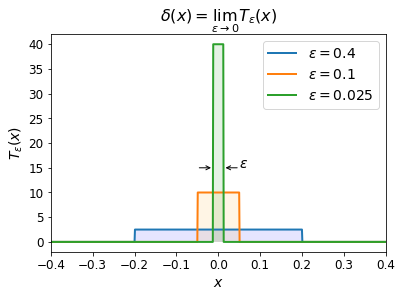

In [93]:
dx = 0.001 
x = np.arange(-2, 2, dx)
def rectangle(x, epsilon):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i]) <= 0.5*epsilon:
            y[i] = 1.0/epsilon
        else:
            y[i] = 0.0
    return y

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_title('$\delta(x)=\lim_{\epsilon\\rightarrow0}T_\epsilon(x)$', fontsize=16)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$T_\epsilon(x)$', fontsize=14)
ax.set_xlim(-0.4, 0.4)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.plot(x, rectangle(x, 0.4), linewidth=2, label='$\epsilon=0.4$')
ax.plot(x, rectangle(x, 0.1), linewidth=2, label='$\epsilon=0.1$')
ax.plot(x, rectangle(x, 0.025), linewidth=2, label='$\epsilon=0.025$')

ax.annotate('', c='black', xy=(-0.0125,15), xytext=(-0.05,15),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'))

ax.annotate('', c='black', xy=(0.0125,15), xytext=(0.05,15),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'))

ax.annotate('$\epsilon$', c='black', fontsize=14, xy=(0.05,15))

ax.fill_between(x, rectangle(x,0.4), x*0, facecolor='blue', alpha=0.1)
ax.fill_between(x, rectangle(x,0.1), x*0, facecolor='orange', alpha=0.1)
ax.fill_between(x, rectangle(x,0.025), x*0, facecolor='green', alpha=0.1)

plt.legend(fontsize=14)
plt.show()

## Fourier transform

In reality, the audio signal is not perfectly periodic since it might be contaminated by a background noise. 
Furthermore the oscillation of the sound wave itself decays gradually to zero, 
so a realistic representation of an audio signal recorded from a microphone might look something like the plot below.

To analyse this audio signal, we shall use Fourier transform, which is an extension of the Fourier series above by taking the limit $T\rightarrow\infty$ (loosely speaking, the function $V(t)$ is no longer periodic).
First let us recall the definition of the Fourier series:
\begin{align}
V(t) &= \sum_{p=-\infty}^{\infty} \tilde{V}(\omega_p) e^{i\omega_p t} \quad\text{(Fourier series)} \\
\tilde{V}(\omega_p) &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} dt \, V(t) e^{-i\omega_p t}. \quad\text{(Fourier series coefficients)}.
\end{align}
Note that we have relabelled $C_p\rightarrow\tilde{V}(\omega_p)$ from the definitions given in the previous section.
The angular frequency $\omega_p$ is an integer multiple of $\frac{2\pi}{T}$, _i.e._
\begin{equation}
\omega_p = \frac{2\pi p}{T},\quad\text{where }p=0,\pm 1,\pm 2,\dots.
\end{equation}
Now let us consider the first equation from the Fourier series above, which we can write as
\begin{align}
V(t) = \sum_{p=-\infty}^{\infty}\Delta p \, \tilde{V}(\omega_p) e^{i\omega_p t},
\end{align}
since $\Delta p = (p+1) - p = 1$.
Now from the definition of the angular frequency, we have $\Delta\omega_p=\frac{2\pi}{T}\Delta p$, and thus
\begin{align}
V(t) = \frac{T}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \, \tilde{V}(\omega_p) e^{i\omega_p t}.
\end{align}
Substituting the second equation from the Fourier series for $\tilde{V}(\omega_p)$, we get:
\begin{align}
V(t) &= \frac{T}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \,  
\left[\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} dt' \, V(t') e^{-i\omega_p t'}\right] e^{i\omega_p t} \\
&= \frac{1}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \,  
\left[ \int_{-\frac{T}{2}}^{\frac{T}{2}} dt' \, V(t') e^{i\omega_p(t-t')} \right].
\end{align}
Finally we can take the limit $T\rightarrow\infty$.
In this case $\omega_p$ becomes continuous $\omega_p\rightarrow\omega\in\mathbb{R}$ and the summation over $\omega_p$ becomes an integral over $\omega$:
\begin{align}
V(t) &= \frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \,  
\left[\int_{-\infty}^{\infty} dt' \, V(t') e^{i\omega(t-t')} \right] \\
&= \int_{-\infty}^{\infty} dt' \, V(t') 
\left[\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \, e^{i\omega(t-t')} \right].
\end{align}
Note that we have swapped the order of integration in the last line.
The right hand side has to be equal to $V(t)$, which implies the term inside the square bracket in the last line above must be the Dirac delta function:
\begin{equation}
\delta(t-t') = \frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \, e^{i\omega(t-t')}.
\end{equation}
Now we can define the Fourier transform to be a transformation from one function $V(t)$ to another function $\tilde{V}(\omega)$:
\begin{align}
V(t):\mathbb{R}\rightarrow\mathbb{C} 
\begin{matrix}
\overset{\text{Fourier transform}}{\longrightarrow} \\
\underset{\text{inverse Fourier transform}}{\longleftarrow}
\end{matrix}
\tilde{V}(\omega):\mathbb{R}\rightarrow\mathbb{C},
\end{align}
through the following formula:
\begin{align}
V(t) &= \int_{-\infty}^\infty \tilde{V}(\omega) e^{i\omega t} d\omega 
\quad\text{(inverse Fourier transform)}\\
\tilde{V}(\omega) &= \frac{1}{2\pi}\int_{-\infty}^\infty V(t) e^{-i\omega t} dt
\quad\text{(Fourier transform).}
\end{align}
Note that the independent variables $t$ and $\omega$ are real, but the dependent variables $V$ and $\tilde{V}$ are complex in general.
In our case, $V(t)$ represents the audio signal and hence $V$ happens to be real.

__Exercise 4.__
Show that if $V(t)$ is real then $\tilde{V}(-\omega)=\tilde{V}(\omega)^*$ for all $\omega\in\mathbb{R}$ and _vice versa_.

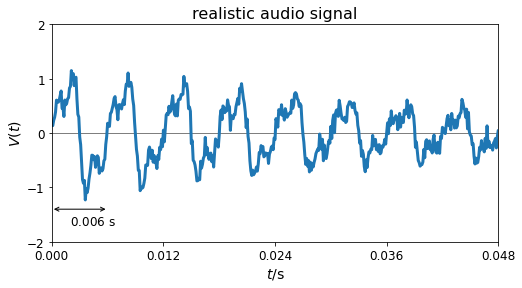

In [94]:
dt = 0.0001
T = 0.006
omega = np.pi*2/T
t = np.arange(0, 0.192, dt)
V = (0.9*np.sin(omega*t) - 0.25*np.sin(2*omega*t) + 0.4*np.sin(3*omega*t) - 0.05*np.sin(4*omega*t))*np.exp(-t/0.05) + 0.1*np.random.normal(0,1, np.shape(t))

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('realistic audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.048)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.049, 0.012))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black', xy=(0.0,-1.4), xytext=(0.006,-1.4),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$0.006$ s', c='black', fontsize=12, xy=(0.002,-1.7))

plt.show()

## Energy spectrum

From electromagnetism, we learnt that the rate of power dissipation is given by:
\begin{equation}
P(t) = \frac{V(t)^2}{R},\quad\text{where $R$ is the electrical resistance.}
\end{equation}
Since power is energy per unit time, the total energy dissipation is then given by the time integral
\begin{equation}
E = \frac{1}{R}\int_{-\infty}^\infty V(t)^2\,dt
\end{equation}
Substituting the definition for Fourier transform to the above, we get:
\begin{align}
E &= \frac{1}{R} \int dt \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') e^{i (\omega + \omega') t} \\
&= \frac{2\pi}{R} \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') \delta(\omega + \omega') \\
&= \frac{2\pi}{R} \int d\omega \, \tilde{V}(\omega) \tilde{V}(-\omega) 
\end{align}
Since $V(t)$ is real, we have $\tilde{V}(-\omega)=\tilde{V}(\omega)^*$ from the previous exercise
and thus the total energy dissipation can be written as:
\begin{equation}
E = \frac{2\pi}{R} \int_{-\infty}^\infty d\omega \, |\tilde{V}(\omega)|^2 
\end{equation}
Now we can define the energy spectrum to be $\tilde{E}(\omega)=|\tilde{V}(\omega)|^2$.
Physically, Fourier transform allows us to decompose an electrical signal into an infinite sum of sinusoidal oscillations with different angular frequencies $\omega$'s.
The energy spectrum $\tilde{E}(\omega)$ gives the energy contribution from a single oscillation with corresponding angular frequency $\omega$.

The figure below shows the energy spectrum $\tilde{E}(f)$ as a function of frequency $f$, which corresponds to the realistic audio signal $V(t)$, shown in the previous figure.
Note that the frequency $f$ is related to the angular frequency by a factor of $2\pi$, _i.e._ $\omega=2\pi f$.
As we can see in the figure below, the energy spectrum spectrum is symmetric with respect to $f\rightarrow-f$
(and for this reason, $\tilde{E}(f)$ is usually plotted on the positive $x$-axis only).
Furthermore we also observe several sharp peaks in the energy spectrum.
The first peak $f\simeq167\,\text{Hz}$ corresponds to the fundamental frequency of the signal.
(Although the signal is no longer periodic, it still retains some underlying periodic characteristics.)
The second peak $f\simeq333\,\text{Hz}$ (which is double the fundamental frequency) corresponds to the second harmonic and so on.
If the signal $V(t)$ had been purely periodic, then the energy spectrum $\tilde{E}(f)$ would have been strictly zero everywhere except at $f=$ multiple integers of the fundamental frequency.

__Exercise 5.__
Show that the energy spectrum is symmetric, _i.e._ $\tilde{E}(\omega)=\tilde{E}(-\omega)$. 

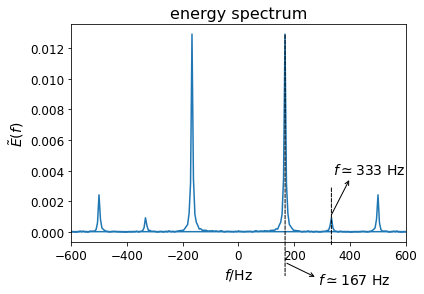

In [95]:
N = np.shape(V)[0]
f = 1/(N*dt)*np.concatenate((np.arange(0, N/2, 1), np.arange(-N/2, 0, 1)))

Vtilde = np.fft.fft(V, norm='forward') # Fourier transform of V(t), Vtilde(omega)

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_title('energy spectrum', fontsize=16)
ax.set_xlabel('$f/$Hz', fontsize=14)
ax.set_ylabel('$\\tilde{E}(f)$', fontsize=14)
ax.set_xlim(-600, 600)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.plot(f, np.real(Vtilde*np.conjugate(Vtilde)))

ax.annotate('', c='black', xy=(167,-0.003), xytext=(167,0.013),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='-', linestyle='--'),
            annotation_clip=False)

ax.annotate('', c='black', xy=(280,-0.003), xytext=(167,-0.002),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'),
            annotation_clip=False)

ax.annotate('', c='black', xy=(333,-0.001), xytext=(333,0.003),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='-', linestyle='--'),
            annotation_clip=False)

ax.annotate('', c='black', xy=(400,0.0035), xytext=(330,0.001), 
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'),
            annotation_clip=False)

ax.annotate('$f\simeq 167$ Hz', c='black', fontsize=14, xy=(285,-0.0034), annotation_clip=False)
ax.annotate('$f\simeq 333$ Hz', c='black', fontsize=14, xy=(340,0.0038), annotation_clip=False)

plt.show()

## Storing audio wave into a computer

Let's say we record a sound on our microphone for the total duration of $t_N$ (also called the sampling time). 
How is this audio signal $V(t)$ stored inside our computer?
Obviously a computer cannot store an infinite amount of information, so the computer has to divide the signal $V(t)$ into discrete values $V(t_0),V(t_1),V(t_2),\dots,V(t_{N-1})$ at discrete times $t_n$'s, as we can see in the figure below.
This also means that the time is discretized into:
$t\rightarrow t_n=n\Delta t$, where $n=0,1,2,\dots,N-1$ and $\Delta t$ is the timestep.
In the figure below, the total time (or sampling time) is $t_N=0.018\,\text{s}$, the timestep is $\Delta t = 0.001\,\text{s}$, and the total number of points is $N=18$.
We also define the framerate to be the total number of points per unit time.
In the figure below, we can calculate the framerate to be:
\begin{equation}
\text{framerate} = \frac{N}{t_N} = \frac{18}{0.018\,\text{s}} = 1000\,\text{s}^{-1}.
\end{equation}
Usually, when we record a sound using recording software such as Audacity, we need to specify this framerate.
Higher framerate will give a better sound quality but the file size will also be bigger!
For a 16-bit digital audio, the values of $V$ ranges from $-32768$ to $32767$ in integer steps (note that $V(t)$ is in some rescaled units).
Therefore the vertical $V$-axis is also discrete. 

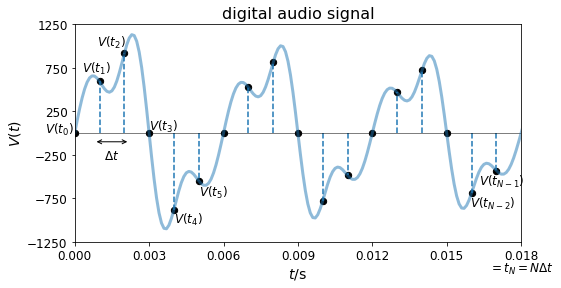

In [96]:
t = np.arange(0, 0.192, 0.0001)
t_discrete = np.arange(0, 0.018, 0.001)
omega = np.pi*2/T
V = (0.9*np.sin(omega*t) - 0.25*np.sin(2*omega*t) + 0.4*np.sin(3*omega*t) - 0.05*np.sin(4*omega*t))*np.exp(-t/0.05)*1000
V_discrete = (0.9*np.sin(omega*t_discrete) - 0.25*np.sin(2*omega*t_discrete) + 0.4*np.sin(3*omega*t_discrete) - 0.05*np.sin(4*omega*t_discrete))*np.exp(-t_discrete/0.05)*1000

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('digital audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.018)
ax.set_ylim(-1250, 1250)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-1250, 1300, 500))
ax.set_xticks(np.arange(0, 0.019, 0.003))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3, alpha=0.5)
ax.scatter(t_discrete, V_discrete, c='black', s=40)
ax.stem(t_discrete, V_discrete, markerfmt=' ', basefmt=' ', linefmt='--', use_line_collection=True)

ax.annotate('', c='black', xy=(0.0008,-100), xytext=(0.0022,-100),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$\Delta t$', c='black', fontsize=12, xy=(0.0012,-300), annotation_clip=False)
ax.annotate('$= t_N = N\Delta t$', c='black', fontsize=12, xy=(0.0167,-1600), annotation_clip=False)
ax.annotate('$V(t_0)$', c='black', fontsize=12, xy=(-0.0012,0.0), annotation_clip=False)
ax.annotate('$V(t_1)$', c='black', fontsize=12, xy=(0.0003,700), annotation_clip=False)
ax.annotate('$V(t_2)$', c='black', fontsize=12, xy=(0.0009,1000), annotation_clip=False)
ax.annotate('$V(t_3)$', c='black', fontsize=12, xy=(0.003,40), annotation_clip=False)
ax.annotate('$V(t_4)$', c='black', fontsize=12, xy=(0.004,-1030), annotation_clip=False)
ax.annotate('$V(t_5)$', c='black', fontsize=12, xy=(0.005,-720), annotation_clip=False)
ax.annotate('$V(t_{N-1})$', c='black', fontsize=12, xy=(0.0163,-595), annotation_clip=False)
ax.annotate('$V(t_{N-2})$', c='black', fontsize=12, xy=(0.01595,-850), annotation_clip=False)

plt.show()

## Discrete Fourier transform

Now how do we perform a Fourier transform operation on the $N$ data points $V(t_0),V(t_1),\dots,V(t_{N-1})$ shown above?
First let us order these $N$ data points as a column vector: $(V(t_0),V(t_1),\dots,V(t_{N-1}))^T$.
The first element in the column vector corresponds to the value of $V$ at time $t_0$, the second element in the column vector corresponds to the value of $V$ at time $t_1$, and so on.
The discrete Fourier transform of $N$ data points $(V(t_0),V(t_1),\dots,V(t_{N-1}))^T$ in time-space is defined to be an ordered set of $N$ points $(\tilde{V}(\omega_0),\tilde{V}(\omega_1),\dots,\tilde{V}(\omega_{N-1}))^T$ in the frequency-space:
\begin{equation}
\begin{pmatrix}
V(t_0) \\
V(t_1) \\
\vdots \\
V(t_{N-1})
\end{pmatrix}
\begin{matrix}
\overset{\text{discrete Fourier transform}}{\longrightarrow} \\
\underset{\text{inverse discrete Fourier transform}}{\longleftarrow}
\end{matrix}
\begin{pmatrix}
\tilde{V}(\omega_0) \\
\tilde{V}(\omega_1) \\
\vdots \\
\tilde{V}(\omega_{N-1})
\end{pmatrix}
\end{equation}
The first element in the column vector on the right hand side above corresponds to the value of $\tilde{V}$ at angular frequency $\omega_0$, the second element corresponds to the value of $\tilde{V}$ at angular frequency $\omega_1$ and so on.
Here both times $t_n$'s and angular frequencies $\omega_p$'s are discrete and finite:
\begin{align}
t_n &= n\Delta t \quad \text{where } n=0,1,2,\dots,N-1 \\
\omega_p &= \frac{2\pi p}{t_N} \quad \text{where } p=0,1,2,\dots,N-1.
\end{align}
Note that $t_N=N\Delta t$ is the total duration of the audio signal.
$(V(t_0),V(t_1),\dots,V(t_{N-1}))^T$ and $(\tilde{V}(\omega_0),\tilde{V}(\omega_1),\dots,\tilde{V}(\omega_{N-1}))^T$ are defined through the following relations:
\begin{align}
V(t_n) &= \sum_{p=0}^{N-1} \tilde{V}(\omega_p)e^{i\omega_p t_n} \quad \text{(inverse discrete Fourier transform)} \\
\tilde{V}(\omega_p) &= \frac{1}{N}\sum_{n=0}^{N-1} V(t_n)e^{-i\omega_p t_n} \quad \text{(discrete Fourier transform)}
\end{align}
Now we will show that the definition of the discrete Fourier transform above makes sense.
Let us substitute the second equation in the definition into the first equation to get:
\begin{align}
V(t_n) &= \frac{1}{N}\sum_{p=0}^{N-1}\sum_{m=0}^{N-1} V(t_m)e^{i\omega_p (t_n - t_m)} \\
&= \frac{1}{N}\sum_{m=0}^{N-1} V(t_m) \left[ \sum_{p=0}^{N-1} e^{i\frac{2\pi}{N} (n - m)p} \right]  
\end{align}
The summation over $p$ inside the square brackets is a geometric sum, so we can use the formula:
\begin{align}
\sum_{p=0}^{N-1} r^p =
\begin{cases}
\frac{1-r^N}{1-r} & \text{if } r\neq1 \\
N & \text{if } r=1
\end{cases}.
\end{align}
So the term inside the square brackets becomes:
\begin{align}
\sum_{p=0}^{N-1} e^{i\frac{2\pi}{N} (n - m)p} &=
\begin{cases}
\frac{1-e^{i 2\pi (n - m)}}{1-e^{i\frac{2\pi}{N} (n - m)}} & \text{if } n\neq m \\
N & \text{if } n=m
\end{cases}  \\
&=
\begin{cases}
0 & \text{if } n\neq m \\
N & \text{if } n=m
\end{cases} \\
&= N \delta_{nm}.
\end{align}
Hence the right hand side in the equation above becomes
\begin{align}
\frac{1}{N}\sum_{m=0}^{N-1} V(t_m) \left[ \sum_{p=0}^{N-1} e^{i\frac{2\pi}{N} (n - m)p} \right] 
= \sum_{m=0}^{N-1} V(t_m) \delta_{nm}
= V(t_n),
\end{align}
which verifies our definition of discrete Fourier transform and its inverse.

__Exercise 6.__
Show that $\tilde{V}(\omega_p)$ is periodic with period $\frac{2\pi}{\Delta t}$, _i.e._,
$\tilde{V}(\omega_p)=\tilde{V}\left(\omega_p+\frac{2\pi}{\Delta t}\right)$.

Since $\tilde{V}(\omega_p)$ is periodic with period $\frac{2\pi}{\Delta t}$, 
we can make the summation inside the discrete Fourier transform a little bit more symmetric:
\begin{align}
V(t_n) &= \sum_{p=-N/2}^{N/2-1} \tilde{V}(\omega_p)e^{i\omega_p t_n} \quad \text{(inverse discrete Fourier transform)} \\
\tilde{V}(\omega_p) &= \frac{1}{N}\sum_{n=0}^{N-1} V(t_n)e^{-i\omega_p t_n} \quad \text{(discrete Fourier transform)},
\end{align}
where the range of the angular frequency $\omega_p$ is shifted to:
\begin{equation}
\omega_p = \frac{2\pi p}{t_N} \quad \text{where } 
p=-\frac{N}{2},-\frac{N}{2}+1,-\frac{N}{2}+2\dots,-2,-1,0,1,2,\dots,\frac{N}{2}-2,\frac{N}{2}-1.
\end{equation}
Now we will discover how the Fourier series, introduced in the beginning of this tutorial, can be derived from discrete Fourier transform.
First we write the discrete Fourier transform as follows:
\begin{align}
\tilde{V}(\omega_p) &= \frac{1}{N\Delta t}\sum_{n=0}^{N-1}\Delta t \, V(t_n)e^{-i\omega_p t_n} \\
&= \frac{1}{t_N}\sum_{n=0}^{N-1}\Delta t \, V(t_n)e^{-i\omega_p t_n}
\end{align}
Next we take the limit $\Delta t\rightarrow 0$ and $N\rightarrow\infty$ and the summation over $t_n$ above becomes an integral over $t$:
\begin{align}
\tilde{V}(\omega_p) = \frac{1}{t_N}\int_0^{t_N} dt \, V(t)e^{-i\omega_p t},
\end{align}
and correspondingly, the inverse discrete Fourier transform becomes:
\begin{equation}
V(t_n) = \sum_{p=-\infty}^{\infty} \tilde{V}(\omega_p)e^{i\omega_p t},
\end{equation}
and thus we recover the Fourier series when we take the limit the time $t_n$ becomes continuous $t_n\rightarrow t\in\mathbb{R}$. 

We can write the discrete Fourier transfrom in the matrix form as follows:
\begin{equation}
\begin{pmatrix}
\tilde{V}(\omega_0) \\
\tilde{V}(\omega_1) \\
\tilde{V}(\omega_2) \\
\vdots \\
\tilde{V}(\omega_{N-1})
\end{pmatrix}
= \frac{1}{N}
\begin{pmatrix}
1 & 1 & 1 & \cdots & 1\\
1 & e^{-i\frac{2\pi}{N}} & e^{-i\frac{2\pi}{N}2} & & \\
1 & e^{-i\frac{2\pi}{N}2} & e^{-i\frac{2\pi}{N}4} & & \\
\vdots & &  & \ddots & \\ 
1 &  &  &  & e^{-i\frac{2\pi}{N}(N-1)^2}
\end{pmatrix}
\begin{pmatrix}
V(t_0) \\
V(t_1) \\
V(t_2) \\
\vdots \\
V(t_{N-1})
\end{pmatrix}
\end{equation}
As we can see from above, if we have $N$ data points, we need to perform an $N\times N$ matrix multiplication.
This means the computation of discrete Fourier transform scales as $N^2$.
However there is an efficient algorithm, called fast Fourier transform, which brings this scaling down to $N\log N$.

__Exercise 7.__
Show that for $N=4$, the matrix form of the discrete Fourier transform can be written as follows:
\begin{equation}
\begin{pmatrix}
\tilde{V}(\omega_0) \\
\tilde{V}(\omega_1) \\
\tilde{V}(\omega_2) \\
\tilde{V}(\omega_3)
\end{pmatrix}
= \frac{1}{4}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & -i & -1 & i \\
1 & -1 & 1 & -1 \\
1 & i & -1 & -i
\end{pmatrix}
\begin{pmatrix}
V(t_0) \\
V(t_1) \\
V(t_2) \\
V(t_3)
\end{pmatrix}
\end{equation}


## Fast Fourier transform

Let us relabel $V(t_n)\rightarrow V_n$ and $\tilde{V}(\omega_p)\rightarrow\tilde{V}_p$, where $n=0,1,2,\dots,N-1$
and $p=-\frac{N}{2},-\frac{N}{2}+1,\dots,-1,0,1,\dots,\frac{N}{2}-1$.
The discrete Fourier transform becomes:
\begin{align}
V_n &= \sum_{p=-N/2}^{N/2} \tilde{V}_p \, e^{i\frac{2\pi}{N}pn} \quad \text{(inverse discrete Fourier transform)} \\
\tilde{V}_p &= \frac{1}{N}\sum_{n=0}^{N-1} V_n \, e^{-i\frac{2\pi}{N}pn} \quad \text{(discrete Fourier transform)},
\end{align}
Written in this way, the discrete Fourier transform does not depend on the time discretization parameter $\Delta t$ anymore.
This is actually the form of discrete Fourier transform which is used in NumPy.
We only need $\Delta t$ when we are plotting $V(t)$ as a function of time $t$ or $\tilde{V}(\omega)$ as a function of $\omega$.
Recall from the previous section, 


## Importing  `.wav` file into a NumPy array

There are different audio formats in computer such as `.mp3` and `.wav`.
The difference is that the former is a compressed file while the later is an uncompressed file.
In this Tutorial, we will only consider `.wav` files. 

Let us now put everything we have learnt above into practice. 
Inside the folder `./samples/` we have various `.wav` files from different notes from different musical instruments.
First let us have a look at the file called `./samples/piano-C4.wav`. 
This is a recording of the note C4 in a piano.
This note has a fundamental frequency of $261.63\,\text{Hz}$.
Let us now analyse this wave file below.
First we need to import the essential libraries such as `numpy`, `matplotlib`, `sys` and `scipy.io.wavfile` into Python, 
as you can see in the first few lines of the code below.
The library `sys` is used to access the filesystem inside our computer and the library `scipy.io.wavfile` is used to import and export `.wav` files.
Next we will open the file `./samples/piano-C4.wav` and save it into a NumPy array, called `V`,
using the method `wavefile.read('./samples/piano-C4.wav')`.
This method also reads the framerate of the `.wav` file which we save into the variable called `framerate`.
In this example, the framerate is $11025\,\text{s}^{-1}$, which we can confirm by printing the value into the screen.
We also need the total number of points, _i.e._ $N$, which we can obtain by finding the length of the array `V` using the method `len(V)`.
In this we get $N=29750$.
Hence we can calculate the total recording time (or sampling time) $t_N$:
\begin{equation}
t_N = \frac{N}{\text{framerate}} \simeq 2.70\,\text{s}.
\end{equation}
We also need to compute the timestep $\Delta t$:
\begin{equation}
\Delta t = \frac{t_N}{N} = \frac{1}{\text{framerate}} \simeq 0.0000907\,\text{s}.
\end{equation}


In [129]:
import numpy as np
import sys
from scipy.io import wavfile

# read a .wav file and store it into a numpy array
framerate1, V1 = wavfile.read('./samples/piano-C4.wav')

print(f'framerate = {framerate1} s^-1')  # print the framerate into the computer screen

N1 = len(V1)  # get the total number of points
print(f'N = {N1}')

tN1 = N1/framerate1  # calculate the total sampling time
print(f't_N = {tN1} s')

dt1 = 1/framerate1  # calculate the timestep
print(f'dt = {dt1} s')

framerate = 11025 s^-1
N = 29750
t_N = 2.6984126984126986 s
dt = 9.070294784580499e-05 s


Next we can then plot the the audio signal $V(t)$ as a function of time $t$ as shown below.
We can also zoom in to look at more details of the audio signal, in particular we can measure the period of the oscillation to be $T\simeq 0.0038\,\text{s}$.
This roughly corresponds to the fundamental frequency of the C4 note which is $f=261.6\,\text{Hz}$.
The table below shows some common musical notes and their fundamental frequencies:

| C4     | D4     | E4     | F4     | G4     | A4     | B4     | C5     |
|--------|--------|--------|--------|--------|--------|--------|--------|
|261.6 Hz|293.7 Hz|329.6 Hz|349.2 Hz|392.0 Hz|440.0 Hz|493.9 Hz|523.3 Hz|

The distance from C4 to C5 is called one octave and the frequency is exactly doubled.

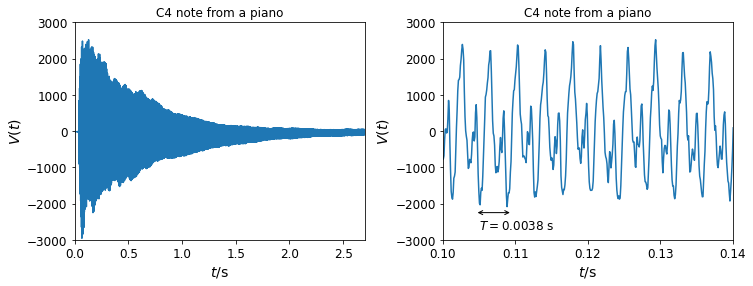

In [159]:
t1 = np.arange(0, tN1, dt1)

fig, ax = plt.subplots(1, 2, figsize=(12.1, 4))

for n in range(0, 2, 1):
    ax[n].set_title("C4 note from a piano")
    ax[n].set_xlabel('$t/$s', fontsize=14)
    ax[n].set_ylabel('$V(t)$', fontsize=14)
    ax[n].set_ylim(-3000, 3000)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].plot(t1, V1)

ax[0].set_xlim(0, 2.7)
ax[0].set_aspect(2.7/8000)
ax[1].set_xlim(0.1, 0.14)
ax[1].set_aspect(0.04/8000)

ax[1].annotate('', c='black', xy=(0.1095,-2250), xytext=(0.1045,-2250),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax[1].annotate('$T=0.0038$ s', c='black', fontsize=12, xy=(0.105,-2700))

plt.show()

We can compare this sound wave with the C4 note from a flute, as shown below.
As we can see the shape of the wave looks different, but the period (and hence the fundamental frequency) remains approximately the same, _i.e._ they both correspond to C4.

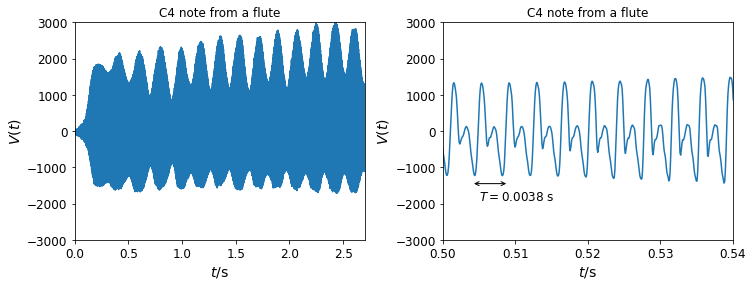

In [165]:
framerate2, V2 = wavfile.read('./samples/flute-C4.wav')

N2 = len(V2)  # get the total number of points
tN2 = N2/framerate2  # calculate the total sampling time
dt2 = 1/framerate2  # calculate the timestep

t2 = np.arange(0, tN2, dt2)

fig, ax = plt.subplots(1, 2, figsize=(12.1, 4))

for n in range(0, 2, 1):
    ax[n].set_title("C4 note from a flute")
    ax[n].set_xlabel('$t/$s', fontsize=14)
    ax[n].set_ylabel('$V(t)$', fontsize=14)
    ax[n].set_ylim(-3000, 3000)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].plot(t2, V2)

ax[0].set_xlim(0, 2.7)
ax[0].set_aspect(2.7/8000)
ax[1].set_xlim(0.5, 0.54)
ax[1].set_aspect(0.04/8000)

ax[1].annotate('', c='black', xy=(0.509,-1450), xytext=(0.504,-1450),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax[1].annotate('$T=0.0038$ s', c='black', fontsize=12, xy=(0.505,-1900))

plt.show()

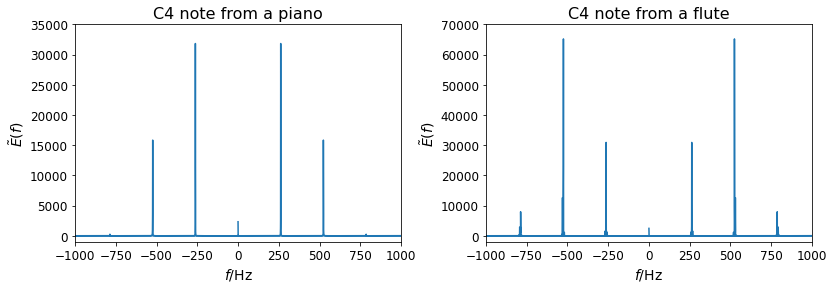

In [166]:
N1 = np.shape(V1)[0]
f1 = 1/(N1*dt1)*np.concatenate((np.arange(0, N1/2, 1), np.arange(-N1/2, 0, 1)))

N2 = np.shape(V2)[0]
f2 = 1/(N2*dt2)*np.concatenate((np.arange(0, N2/2, 1), np.arange(-N2/2, 0, 1)))

Vtilde1 = np.fft.fft(V1, norm='forward') # Fourier transform of V(t), Vtilde(omega)
Vtilde2 = np.fft.fft(V2, norm='forward') 

fig, ax = plt.subplots(1, 2, figsize=(13.5, 4))

for n in range(0, 2, 1):
    ax[n].set_xlabel('$f/$Hz', fontsize=14)
    ax[n].set_ylabel('$\\tilde{E}(f)$', fontsize=14)
    ax[n].set_xlim(-1000, 1000)
    ax[n].tick_params(axis='both', which='major', labelsize=12)

ax[0].set_title('C4 note from a piano', fontsize=16)
ax[1].set_title('C4 note from a flute', fontsize=16)

ax[0].set_ylim(-1000, 35000)
ax[1].set_ylim(-2000, 70000)

ax[0].set_aspect((2/3)*2000/36000)
ax[1].set_aspect((2/3)*2000/72000)

ax[0].plot(f1, np.real(Vtilde1*np.conjugate(Vtilde1)))
ax[1].plot(f2, np.real(Vtilde2*np.conjugate(Vtilde2)))

plt.show()

## Exporting NumPy array into a `.wav` file



Start recording
End recording


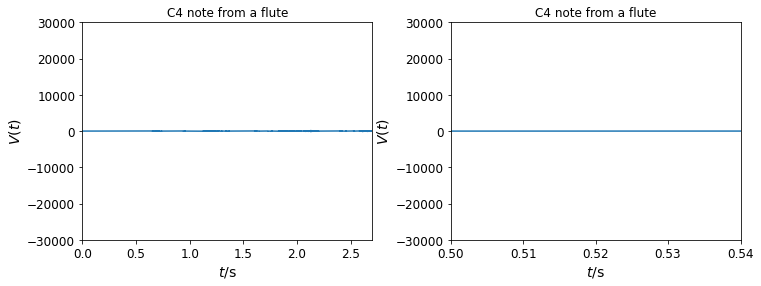

In [101]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

framerate = 44100  # frame rate
tN = 3  # total duration of recording

V = sd.rec(int(tN * framerate), samplerate=framerate, channels=1, dtype='int16')
print('Start recording')
sd.wait()  # Wait until recording is finished
print('End recording')

wavfile.write('output.wav', framerate, V)  # Save as WAV file 

N = len(V)  # get the total number of points
dt = 1/framerate  # calculate the timestep

t = np.arange(0, tN, dt)

fig, ax = plt.subplots(1, 2, figsize=(12.1, 4))

for n in range(0, 2, 1):
    ax[n].set_title("C4 note from a flute")
    ax[n].set_xlabel('$t/$s', fontsize=14)
    ax[n].set_ylabel('$V(t)$', fontsize=14)
    ax[n].set_ylim(-30000, 30000)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].plot(t, V)

ax[0].set_xlim(0, 2.7)
ax[0].set_aspect(2.7/80000)
ax[1].set_xlim(0.5, 0.54)
ax[1].set_aspect(0.04/80000)

plt.show()

In [102]:
print(myrecording)

NameError: name 'myrecording' is not defined

### References

1. [Digital Audio Fundamentals, Audacity]
2. [Sound Examples, Dan Ellis, Columbia University]
3. [Playing and Recording Sound in Python, Real Python]
4. [Electronic Music Studios, University of Iowa]


[Electronic Music Studios, University of Iowa]: https://theremin.music.uiowa.edu/MIS.html
[Digital Audio Fundamentals, Audacity]: https://manual.audacityteam.org/man/digital_audio.html
[Sound Examples, Dan Ellis, Columbia University]: https://www.ee.columbia.edu/~dpwe/sounds/
[Playing and Recording Sound in Python, Real Python]: https://realpython.com/playing-and-recording-sound-python/